In [2]:
from CNN_utils import *
import pandas as pd
import keras_tuner as kt
from sklearn.preprocessing import LabelEncoder

tf.config.run_functions_eagerly(True)  # Force eager execution

from tensorflow.keras.utils import to_categorical
import numpy as np


2025-05-03 13:48:22.722430: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-03 13:48:22.733860: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 13:48:22.818954: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 13:48:22.915303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746272903.015931 2800308 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746272903.04

### 1. + 2. Dataset import and split


sr:  7876.923076923076
Duration of each sample:  1.3 s
Train set
Number of elements in each class:  187
Number of sounds in dataset:  748


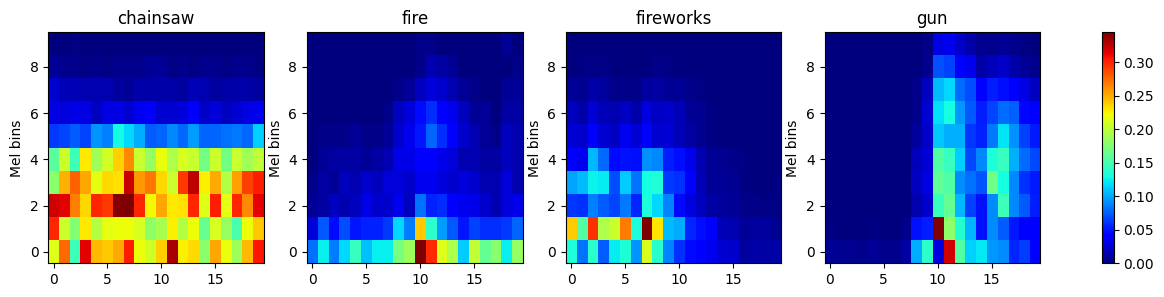

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun o

Test set
Number of elements in each class:  40
Number of sounds in dataset:  160


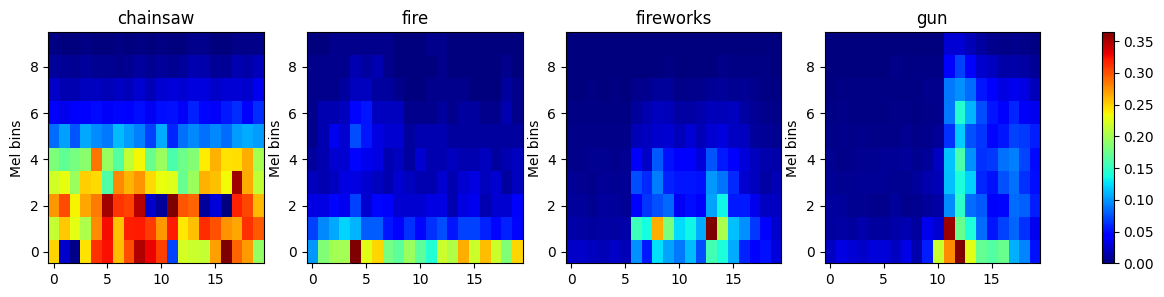

In [3]:
#Physical HP
#------------------------------------
Nft = 512
samples_per_melvec = Nft
n_melvec = 20
melvec_height = 10
window_type = "hamming" #hamming, hanning, blackman, rectangular, triangular
#Final sr: 7876.923076923076
sr = 7876.923076923076
#sr = 512 * n_melvec / 1.3
print("sr: ", sr)
flag_8bit = True #True
bit_sensitivity = 5 #0.1

#Visualisation
img_idx = 20
test_img_idx = 20

CNN_dataset = True

#HUGE CHANGE: trainset and testset are now obsolete:
#The train set is now totalset, without the background noise
#filter_str: only keeps the files that contain the filter_str
#The "physical_bg" noise now corresponds to the youtube sounds
#The test set is now the background noise

#TODO: When youtube sounds proved to be usedfull, modify Dataset class 
#so that they are taking into account in the time shift and add_bg
#------------------------------------

#1. Import classical  - #2. Train-test split
#--------------------------------
duration = n_melvec * Nft / sr 
print("Duration of each sample: ", duration, "s")


print("Train set")
#Does not take the background noise and youtube sounds into account
myds, dataset, classnames = get_dataset(path="../datasets/sounds/recorded_sounds/totalset_with_new/", filter_str=None,
    Nft=Nft, n_melvec=n_melvec, melvec_height=melvec_height, samples_per_melvec=samples_per_melvec,
    window_type=window_type, sr = sr, flag_8bit = flag_8bit, bit_sensitivity=bit_sensitivity,
    normalize=True, shift_pct=0, verbose=True, img_idx = img_idx, play_sound=True, CNN_dataset = CNN_dataset)

print("Test set")
myds_test, dataset_test, _ = get_dataset(path="../datasets/sounds/recorded_sounds/totalset_with_new/", filter_str="_background_", #"_background_",
    Nft=Nft, n_melvec=n_melvec, melvec_height=melvec_height, samples_per_melvec=samples_per_melvec,
    window_type=window_type, sr = sr,  flag_8bit = flag_8bit, bit_sensitivity=bit_sensitivity,
    normalize=True, shift_pct=0, verbose=True, img_idx = test_img_idx, play_sound=False, CNN_dataset = CNN_dataset)




Dataset Augmentations
pickle_name:  ../datasets/melvecs/HP_tuning/melvecs_int8s5_512_512_20_10_hamming_7876_time_shift_15_2D_

TRAIN SET
File ../datasets/melvecs/HP_tuning/melvecs_int8s5_512_512_20_10_hamming_7876_time_shift_15_2D_ not found. Generating new dataset.
Number of shifts:  15
Number of bg_amplitude_limit and values:  0 []
Physical augmentation:  False
X_aug shape:  (11968, 10, 20)


/home/martin/Documents/EPL/M1/Project-Embedded/LELEC210X/classification/src/classification/Q2/mcu_emulation_v2_1.py:90: RuntimeWarning: divide by zero encountered in scalar floor_divide
  buf[i] = ((np.int32(buf_fft[i]) << (num_bits-1)) // np.int32(vmax)).astype(np.int16)


Augmenting with time_shift
Shift number:  1
Shift percentage:  0.8386232547883467
0/187
1/187
2/187
3/187
4/187
5/187
6/187
7/187
8/187
9/187
10/187
11/187
12/187
13/187
14/187
15/187
16/187
17/187
18/187
19/187
20/187
21/187
22/187
23/187
24/187
25/187
26/187
27/187
28/187
29/187
30/187
31/187
32/187
33/187
34/187
35/187
36/187
37/187
38/187
39/187
40/187
41/187
42/187
43/187
44/187
45/187
46/187
47/187
48/187
49/187
50/187
51/187
52/187
53/187
54/187
55/187
56/187
57/187
58/187
59/187
60/187
61/187
62/187
63/187
64/187
65/187
66/187
67/187
68/187
69/187
70/187
71/187
72/187
73/187
74/187
75/187
76/187
77/187
78/187
79/187
80/187
81/187
82/187
83/187
84/187
85/187
86/187
87/187
88/187
89/187
90/187
91/187
92/187
93/187
94/187
95/187
96/187
97/187
98/187
99/187
100/187
101/187
102/187
103/187
104/187
105/187
106/187
107/187
108/187
109/187
110/187
111/187
112/187
113/187
114/187
115/187
116/187
117/187
118/187
119/187
120/187
121/187
122/187
123/187
124/187
125/187
126/187
127/187
128/

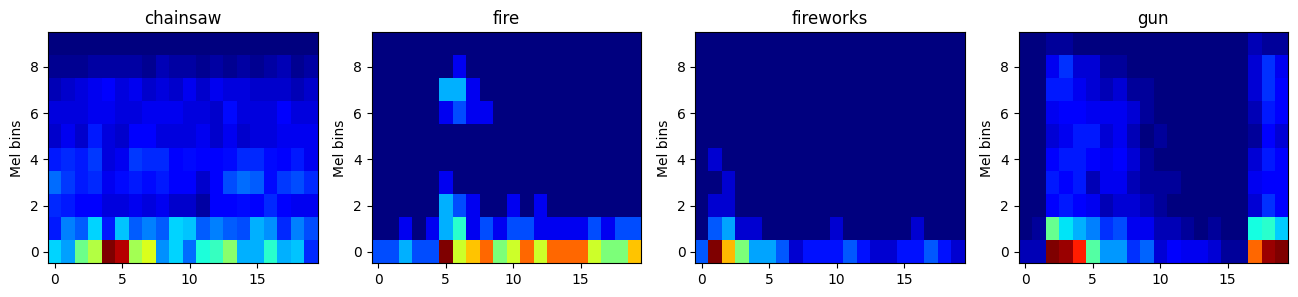

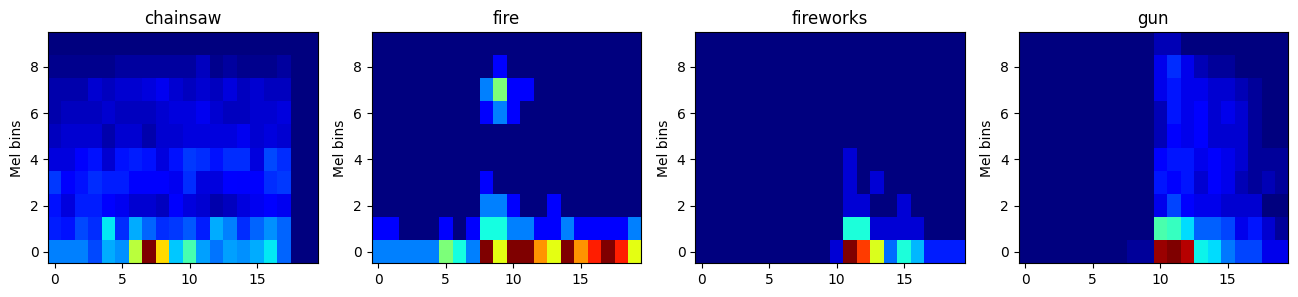

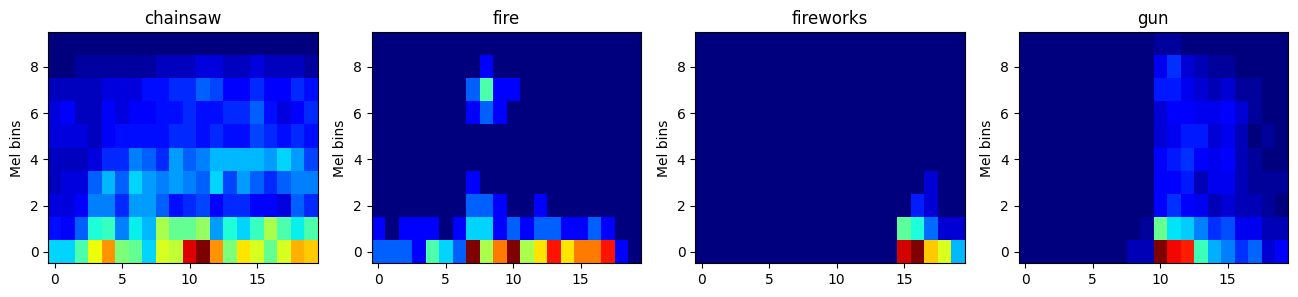

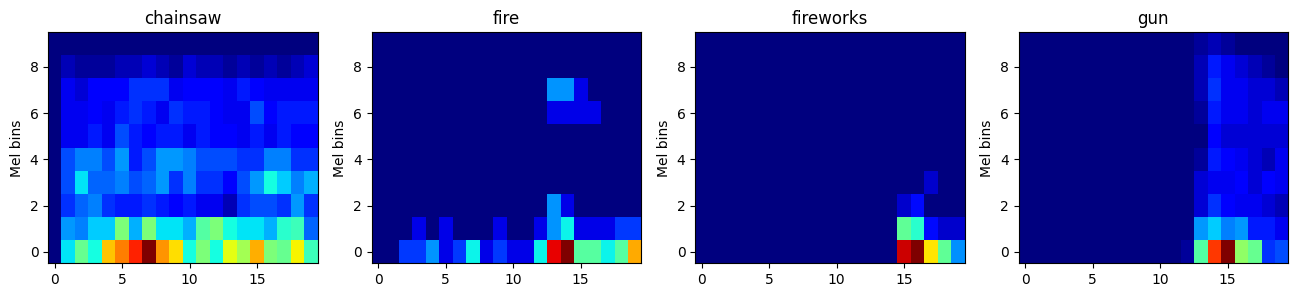

(10, 20)
(10, 20)
(10, 20)
(10, 20)
train shape:  (10, 20)
TEST SET
pickle_name_test:  ../datasets/melvecs/HP_tuning/melvecs_test_int8s5_512_512_20_10_hamming_7876_time_shift_2_2D_
File ../datasets/melvecs/HP_tuning/melvecs_test_int8s5_512_512_20_10_hamming_7876_time_shift_2_2D_ not found. Generating new dataset.
Number of shifts:  2
Number of bg_amplitude_limit and values:  0 []
Physical augmentation:  False
X_aug shape:  (480, 10, 20)
Augmenting with time_shift
Shift number:  1
Shift percentage:  0.9195371251018208
0/40
1/40
2/40
3/40
4/40
5/40
6/40
7/40
8/40
9/40
10/40
11/40
12/40
13/40
14/40
15/40
16/40
17/40
18/40
19/40
20/40
21/40
22/40
23/40
24/40
25/40
26/40
27/40
28/40
29/40
30/40
31/40
32/40
33/40
34/40
35/40
36/40
37/40
38/40
39/40
Shift number:  2
Shift percentage:  0.0910198602409571
0/40
1/40
2/40
3/40
4/40
5/40
6/40
7/40
8/40
9/40
10/40
11/40
12/40
13/40
14/40
15/40
16/40
17/40
18/40
19/40
20/40
21/40
22/40
23/40
24/40
25/40
26/40
27/40
28/40
29/40
30/40
31/40
32/40
33/4

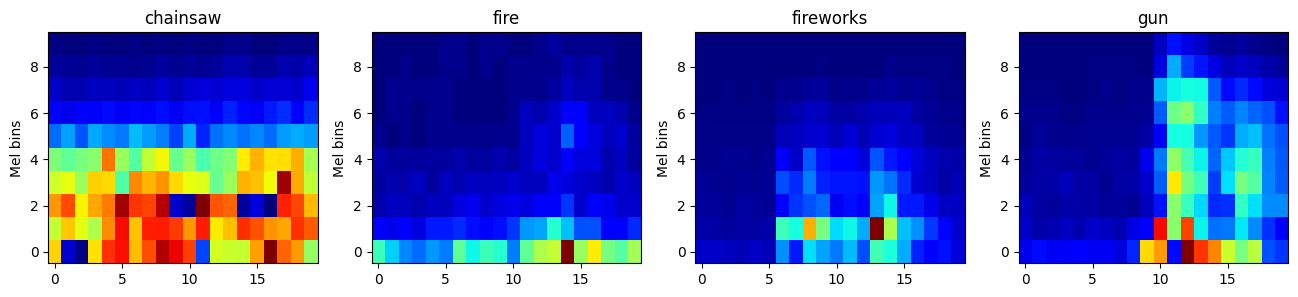

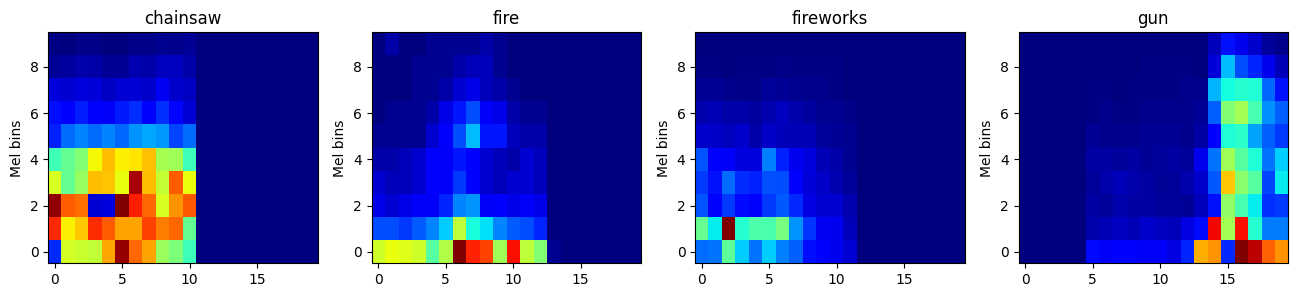

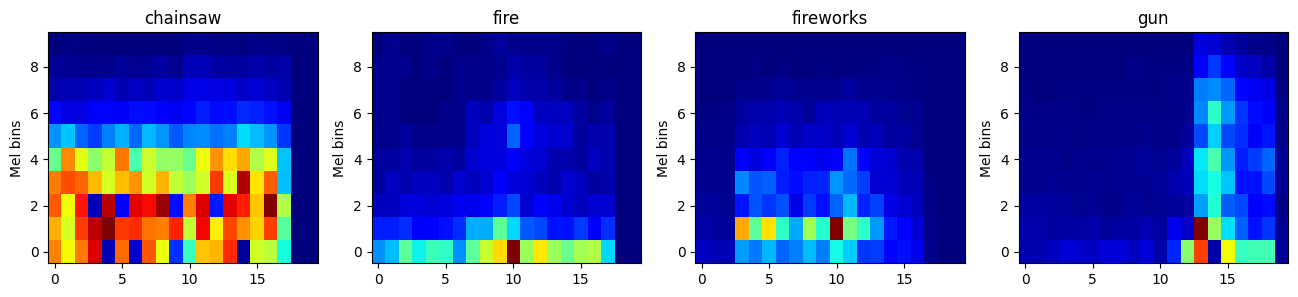

X_test shape:  (480, 10, 20)
Removed 0 invalid samples!
X_train shape after removing invalid samples: (11968, 10, 20)


In [4]:
#3. Dataset augmentations
#----------------------------
#physical_bg is now physical_bg, name not changed inside the files

img_idx = 130
test_img_idx = 20
#CAREFUL: always respect the order
#augmentations = ["time_shift", "add_bg", "physical_bg"]
#augmentations = ["physical_bg"] #Physical bg is now youtube - TODO: correct the dataset code
augmentations = ["time_shift"]
shift_nb = 15                  if "time_shift" in augmentations else 0
bg_amplitude_limit = [0.1, 0.316] if "add_bg" in augmentations else []      #0.1: 20dB, 0.316: 5dB
physical_aug = ("physical_bg" in augmentations)

plot_indexes = [0,1,2,3] #indexes of the samples to plot
load_matrix = True

print("\nDataset Augmentations")
if "add_bg" in augmentations:
    bg_dataset = Dataset(folder="../datasets/sounds/recorded_sounds/background/", filter_str=None)
else :
    bg_dataset = None

if "physical_bg" in augmentations:
    my_phy_ds, phy_bg_dataset, classnames = get_dataset(path="../datasets/sounds/recorded_sounds/trainset_with_new/", filter_str="youtube",
    Nft=Nft, n_melvec=n_melvec, melvec_height=melvec_height, samples_per_melvec=samples_per_melvec,
    window_type=window_type, sr = sr,  flag_8bit = flag_8bit, bit_sensitivity=bit_sensitivity,
    normalize=True, shift_pct=0, verbose=False, img_idx = img_idx, play_sound=False, CNN_dataset = CNN_dataset)
else :
    my_phy_ds = None
    phy_bg_dataset = None


pickle_name = get_picklename( flag_8bit, bit_sensitivity,Nft,samples_per_melvec,n_melvec,melvec_height,window_type,sr,augmentations,shift_nb,bg_amplitude_limit,physical_aug,
    prefix="../datasets/melvecs/HP_tuning/",
    purpose = "melvecs" # "model"
)
if CNN_dataset:
    pickle_name+="_2D_"
print("pickle_name: ", pickle_name)

#---------------------------------

#Visualisation purposes
verbose = True
play_sound = True
print()
print("TRAIN SET")
X_train, y_train = augment_dataset(myds, dataset, classnames, augmentations, n_melvec = n_melvec, melvec_height=melvec_height,
                    shift_nb = shift_nb, #numbers of shifts done
                    bg_dataset = bg_dataset, bg_amplitude_limit=bg_amplitude_limit, #dataset used for background noise, background amplitudes
                    physical_bg_dataset = phy_bg_dataset,my_phy_ds = my_phy_ds, #dataset used for physical background noises
                    verbose=verbose, img_idx=img_idx, aug_indexes=plot_indexes, play_sound=play_sound, #verbose parameters
                    load_matrix=load_matrix, pickle_name=pickle_name, CNN_dataset=CNN_dataset) #load and save parameters


for class_idx, classname in enumerate(classnames):
    #print(classname, idx)
    featvec = myds[classname, 0]
    print(featvec.shape)
print("train shape: ", X_train[0].shape)
"""
TODO: ADD SHIFTS TO THE TEST SET
"""
print("TEST SET")
plot_indexes = [0,1,2]
verbose = True
play_sound = False

augmentations_test = ["time_shift"]
#augmentations_test = ["time_shift"] 
nb_shift_test = 2 if "time_shift" in augmentations_test else 0

pickle_name_test = get_picklename(
    flag_8bit, bit_sensitivity,Nft,samples_per_melvec,n_melvec,melvec_height,window_type,sr,augmentations_test,nb_shift_test,bg_amplitude_limit,physical_aug,
    prefix="../datasets/melvecs/HP_tuning/",
    purpose = "melvecs_test" # "model"
)
if CNN_dataset:
    pickle_name_test+="_2D_"
print("pickle_name_test: ", pickle_name_test)
load_matrix_test = True


X_test, y_test = augment_dataset(myds_test, dataset_test, classnames, augmentations = augmentations_test
                                 , n_melvec = n_melvec, melvec_height=melvec_height,
                                 
                shift_nb = nb_shift_test, #numbers of shifts done
                bg_dataset = None, bg_amplitude_limit=[], #dataset used for background noise, background amplitudes
                physical_bg_dataset = phy_bg_dataset,my_phy_ds = my_phy_ds, #dataset used for physical background noises
                verbose=verbose, img_idx=test_img_idx, aug_indexes=plot_indexes, play_sound=play_sound, #verbose parameters
               load_matrix=load_matrix_test, pickle_name=pickle_name_test, CNN_dataset=CNN_dataset) #load and save parameters

#Print shape of the test set
print("X_test shape: ", X_test.shape)

# Transform the labels to integers and save mapping
label_to_id = {label: i for i, label in enumerate(classnames)}
id_to_label = {i: label for label, i in label_to_id.items()}
y_train = np.array([label_to_id[label] for label in y_train])
y_test = np.array([label_to_id[label] for label in y_test])


#Shuffle X_train and y_train
indices = np.arange(len(X_train))
np.random.shuffle(indices)
X_train = X_train[indices]
y_train = y_train[indices]

#shuffle X_test and y_test
indices = np.arange(len(X_test))
np.random.shuffle(indices)
X_test = X_test[indices]
y_test = y_test[indices]


if CNN_dataset:
    # Identify invalid samples (all zeros or NaNs) across all dimensions except the first
    invalid_mask = np.any(np.isnan(X_train), axis=tuple(range(1, X_train.ndim))) | \
                np.all(X_train == 0, axis=tuple(range(1, X_train.ndim)))

    # Invert the mask to get valid entries
    valid_mask = ~invalid_mask

    # Filter X_train and y_train
    X_train = X_train[valid_mask]
    y_train = y_train[valid_mask]

    print(f"Removed {np.sum(invalid_mask)} invalid samples!")
    print(f"X_train shape after removing invalid samples: {X_train.shape}")
else:
    # Identify invalid samples (all zeros or NaNs)
    invalid_mask = np.any(np.isnan(X_train), axis=tuple(range(1, X_train.ndim))) | \
                np.all(X_train == 0, axis=tuple(range(1, X_train.ndim)))

    # Invert the mask to get valid entries
    valid_mask = ~invalid_mask

    # Filter X_train and y_train
    X_train = X_train[valid_mask]
    y_train = y_train[valid_mask]


    print(f"Removed {np.sum(invalid_mask)} invalid samples!")
    print(f"X_train shape after removing invalid samples: {X_train.shape}")


### 5. Modelling

In [5]:

#CNN architecture
#----------------------------------------------
#Tuner
epochs = 50
epochs_tuner = 10
validation_split = 0.2
patience = 8
batch_size = 32
#TODO: optimal batch size to find

#A. HyperResNet
hyperResNet = HyperResNet(input_shape=X_train.shape[1:], classes=4)

#B. HyperEfficientNet
hyperEfficientNet = HyperEfficientNet(input_shape=X_train.shape[1:], classes=4)

#C. HyperXception
hyperXception = HyperXception(input_shape=X_train.shape[1:], classes=4)


if CNN_dataset:
    def self_made_builder_factory(input_shape):
        def self_made_builder(hp):
            try:
                model = tf.keras.Sequential()
                model.add(tf.keras.Input(shape=input_shape))  # Ensure this is (height, width, channels)
                model.add(tf.keras.layers.Reshape((input_shape[0], input_shape[1], 1)))

                num_conv_layers = hp.Int("num_conv_layers", 0, 3)

                for i in range(num_conv_layers):
                    kernel_size = hp.Choice(f"kernel_size_{i}", values=[3, 5, 7, 9])
                    pool_size = hp.Choice(f"pool_size_{i}", values=[2, 3, 4])

                    model.add(
                        tf.keras.layers.Conv2D(
                            filters=hp.Int(f"filters_{i}", min_value=16, max_value=256, step=16),
                            kernel_size=(kernel_size, kernel_size),
                            activation=hp.Choice(f"activation_conv_{i}", values=['relu', 'tanh', 'sigmoid']),
                        )
                    )
                    model.add(tf.keras.layers.MaxPooling2D(pool_size=(pool_size, pool_size)))
                    model.add(tf.keras.layers.BatchNormalization())
                
                # After convolutional layers, flatten the output to feed into dense layers
                model.add(tf.keras.layers.Flatten())

                # Dense layers
                for i in range(hp.Int("num_dense_layers", 1, 3)):  # Flexible Dense layers
                    model.add(
                        tf.keras.layers.Dense(
                            units=hp.Int(f"dense_layer_{i}", min_value=32, max_value=256, step=32),
                            activation=hp.Choice('activation_dense_{i}', values=['relu', 'tanh', 'sigmoid']),
                            reg_strength = hp.Choice("l2_reg", values=[0.0, 0.001, 0.01, 0.05, 0.1]),
                            kernel_regularizer=tf.keras.regularizers.l2(reg_strength)
                        )
                    )
                    model.add(tf.keras.layers.Dropout(rate=hp.Float(f"dropout_rate_{i}", min_value=0.1, max_value=0.6, step=0.1)))

                model.add(tf.keras.layers.Dense(4, activation='softmax'))

                # Learning rate and optimizer
                hp_learning_rate = hp.Choice('learning_rate', values=[0.5e-1,1e-2, 1e-3, 1e-4])
                opt = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)

                model.compile(optimizer=opt,
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
                return model
            except Exception as e:
                # Return a dummy model with 0 output (guaranteed to perform poorly)
                dummy = tf.keras.Sequential()
                dummy.add(tf.keras.Input(shape=input_shape))
                dummy.add(tf.keras.layers.Flatten())
                dummy.add(tf.keras.layers.Dense(4, activation='softmax'))
                dummy.compile(
                    optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy']
                )
                print(f"[WARNING] Model creation failed for this config: {e}")
                return dummy
        return self_made_builder
else:      
    #D. Self-made 1
    def self_made_builder_factory(input_shape):
        #Enable to pass input_shape to the function
        def self_made_builder(hp):
            
            model = tf.keras.Sequential()
            model.add(tf.keras.Input(shape = input_shape))
            model.add(tf.keras.layers.Flatten())

            hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])

            for i in range(hp.Int("num_layers", 1,4)):
                model.add(
                    tf.keras.layers.Dense(
                        # Tune number of units separately.
                        units=hp.Int(f"layer_{i}", min_value=1, max_value=526, step=32),
                        activation=hp_activation,
                    )
                )
                ## Add dropout after each dense layer
                model.add(
                    tf.keras.layers.Dropout(
                        rate=hp.Float(f"dropout_rate_{i}", min_value=0.1, max_value=0.5, step=0.1)
                    )
                )
            #hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=512, step=32)
            #hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=512, step=32)
            hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]) 

            #model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation))
            #model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation))
            model.add(tf.keras.layers.Dense(4, activation='softmax'))

            opt = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)

            model.compile(optimizer=opt,
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

            return model
        return self_made_builder

if CNN_dataset:
    project_name = "basic_ref_model_2D_20melvecs_time_shift15"
else:
    project_name = "basic_ref_model"
    #project_name = "test_opti"


def create_tuner(hypermodel):
    return kt.Hyperband(hypermodel,
                    objective='val_accuracy',
                    max_epochs=epochs_tuner,
                    factor=3,
                    directory='hp_dir',
                    project_name=project_name,
                    overwrite= True)
'''
basic_ref_model
Hyperparameters:
activation: relu
num_layers: 1
layer_0: 256
learning_rate: 0.01
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.7013888955116272
Kfold: 82
Test: 58
'''

# Add a channel dimension (grayscale images or 1-channel features)
#X_train = X_train[..., np.newaxis]
#X_test = X_test[..., np.newaxis]

#print(X_train[1].shape)

#from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(y_train, num_classes=4)
#(A: HyperResNet, B: HyperEfficientNet, C: HyperXception, D: self_made_builder)
#input_shape = X_train.shape[1:]
#input_shape = X_train[0].shape


input_shape = X_train[0].shape 
print("input shape: ", input_shape)

builder = self_made_builder_factory(input_shape)
tuner = create_tuner(builder)
'''
# Create the HyperResNet model
hypermodel = HyperResNet(input_shape=input_shape, classes=4)

# Create the tuner
tuner = kt.Hyperband(
    hypermodel,
    objective='val_accuracy',
    max_epochs=epochs_tuner,
    factor=3,
    directory='hp_dir',
    project_name='hyperresnet',
    overwrite=True
)
'''

# Create an hp object to pass batch size
#hp = kt.HyperParameters()
#batch_size = hp.Choice('batch_size', values=[32,64,128])
print("batch size: ", batch_size)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)

# Run tuner search
tuner.search(
    X_train, y_train,
    epochs=epochs,
    validation_split=validation_split,
    callbacks=[stop_early],
    batch_size=batch_size
)

tuner.results_summary()


Trial 30 Complete [00h 01m 53s]
val_accuracy: 0.6081871390342712

Best val_accuracy So Far: 0.6131996512413025
Total elapsed time: 00h 21m 00s
Results summary
Results in hp_dir/basic_ref_model_2D_20melvecs_time_shift15
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0016 summary
Hyperparameters:
num_conv_layers: 3
kernel_size_0: 7
pool_size_0: 4
filters_0: 128
activation_conv_0: sigmoid
num_dense_layers: 3
dense_layer_0: 64
activation_dense_{i}: sigmoid
l2_reg: 0.05
kernel_size_1: 5
pool_size_1: 4
filters_1: 16
activation_conv_1: relu
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0015
Score: 0.6131996512413025

Trial 0028 summary
Hyperparameters:
num_conv_layers: 3
kernel_size_0: 9
pool_size_0: 2
filters_0: 80
activation_conv_0: tanh
num_dense_layers: 3
dense_layer_0: 128
activation_dense_{i}: sigmoid
l2_reg: 0.0
kernel_size_1: 3
pool_size_1: 4
filters_1: 16
activation_conv_1: sigmoid
kernel_size_2: 3
pool_size_2: 

### 6. Training

In [ ]:

#5. Final model
validation_split = 0.2
final_epochs = 60
final_patience = 10
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=final_patience, restore_best_weights=True)


model_name = get_picklename(
    flag_8bit, bit_sensitivity,Nft,samples_per_melvec,n_melvec,melvec_height,window_type,sr,augmentations,shift_nb,
    bg_amplitude_limit,physical_aug,
    prefix="../datasets/models/",
    purpose = "model"
)

best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
print("Best hyperparameters: ", best_hps.values)
hp_learning_rate = best_hps.get('learning_rate')

#Temporary model to find the best number of epochs - avoid overfitting
temp_model = tuner.hypermodel.build(best_hps)
history = temp_model.fit(X_train, y_train, epochs=final_epochs, validation_split=validation_split, callbacks=[stop_early])
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))


Best hyperparameters:  {'num_conv_layers': 3, 'kernel_size_0': 7, 'pool_size_0': 4, 'filters_0': 128, 'activation_conv_0': 'sigmoid', 'num_dense_layers': 3, 'dense_layer_0': 64, 'activation_dense_{i}': 'sigmoid', 'l2_reg': 0.05, 'kernel_size_1': 5, 'pool_size_1': 4, 'filters_1': 16, 'activation_conv_1': 'relu', 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0015'}
[WARNING] Model creation failed for this config: Computed output size would be negative. Received `inputs shape=(None, 1, 3, 128)`, `kernel shape=(5, 5, 128, 16)`, `dilation_rate=[1 1]`.
Epoch 1/60
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.3580 - loss: 1.3500 - val_accuracy: 0.4791 - val_loss: 1.2559
Epoch 2/60
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.4992 - loss: 1.2398 - val_accuracy: 0.5167 - val_loss: 1.1946
Epoch 3/60
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5182 - loss: 1.1926 - val_accuracy: 0.5401 - val_loss: 1.1576


### 8. Final model evaluation

In [8]:
#Final results
#------------------------------

if y_train.ndim > 1:
    y_train = np.argmax(y_train, axis=1)
if y_test is not None and y_test.ndim > 1:
    y_test = np.argmax(y_test, axis=1)


#Remove tensorflow warnings
tf.data.experimental.enable_debug_mode()

#Train the model with the best hyperparameters and best epoch
hypermodel = tuner.hypermodel.build(best_hps)
hp_learning_rate = best_hps.get('learning_rate')
opt = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
hypermodel.compile(optimizer=opt,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=validation_split) #validation_split=validation_split)
k = 5
epochs_kfold = best_epoch / 5

save_model = True

#Clone the model for k-fold
kfold_model = tf.keras.models.clone_model(hypermodel)
#Get the best tuning rate from the best hyperparameters
hp_learning_rate = best_hps.get('learning_rate')
opt = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
kfold_model.compile(optimizer=opt,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])


 # Make sure to recompile
# Train of the model & evaluation -  K-Fold cross-validation
kfold_acc, kfold_recall, kfold_f1 = perform_kfold(kfold_model, X_train, y_train, k=k, epochs=epochs_kfold)


#Train- Test evaluation
train_confmat, train_report, test_accuracy, test_confmat, test_report= evaluate_model(hypermodel, 
                        X_train, y_train, classnames, X_test, y_test,show_confusion=True)


if (X_test is not None):
    predictions = hypermodel.predict(X_test)
    eval_result = hypermodel.evaluate(X_test, y_test)
    print("[test loss, test accuracy]:", eval_result)
'''
# Step 1: K-Fold Evaluation (using clone_model and perform_kfold)
kfold_acc, kfold_recall, kfold_f1 = perform_kfold(hypermodel, X_train, y_train, k=k, epochs=epochs_kfold)

# Step 2: Final Training
final_model = tuner.hypermodel.build(best_hps)
final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_hps.get('learning_rate')),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

final_model.fit(X_train, y_train, epochs=best_epoch, validation_split=validation_split)

# Step 3: Final Test Evaluation
train_confmat, train_report, test_accuracy, test_confmat, test_report = evaluate_model(
    final_model, X_train, y_train, classnames, X_test, y_test, show_confusion=True)
'''
    
if save_model:
    model_name = get_picklename(
        flag_8bit, bit_sensitivity,        
        Nft,
        samples_per_melvec,
        n_melvec,
        melvec_height,
        window_type,
        sr,
        augmentations,
        shift_nb,
        bg_amplitude_limit,
        physical_aug,
        prefix="../datasets/models/",
        purpose = "model"
    )
    model_name += "CNN_20melvecs" 
    #Add _train_{kfold_acc}_test_{test_accuracy} to the name
    model_name += "_train_{:.0f}_test_{:.0f}".format(np.mean(kfold_acc*100), test_accuracy*100)

    #Check if the model already exists
    if os.path.exists(model_name + ".h5"):
        print("Model already exists!!")
        model_name = model_name + "_new"
    print("Saving model to: ", model_name)
    hypermodel.save(model_name + ".h5")


[WARNING] Model creation failed for this config: Computed output size would be negative. Received `inputs shape=(None, 1, 3, 128)`, `kernel shape=(5, 5, 128, 16)`, `dilation_rate=[1 1]`.


KeyError: 'learning_rate does not exist.'